<a href="https://colab.research.google.com/github/kedarkotwal1/FraudJobDetection/blob/main/FraudJobDetection_IndiaJobs_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import sys
import pandas as pd
import nltk
import numpy as np
import re
import io
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
cd drive/MyDrive/MSC_Project 

[Errno 2] No such file or directory: 'drive/MyDrive/MSC_Project'
/content/drive/MyDrive/MSC_Project


In [187]:
scjobdf = pd.read_csv('FinalDataset.csv')

#Understanding the dataset

In [188]:
print(scjobdf.head())

   Unnamed: 0                                              title  \
0           0                                        QA Engineer   
1           1                                                PMO   
2           2                                       Chat Support   
3           3                                   Angular Engineer   
4           4  Work From Home -Technical Support- Work From H...   

                location   salary_range  \
0  Bengaluru / Bangalore            NaN   
1  Bengaluru / Bangalore            NaN   
2             Chandigarh  240000-280000   
3                 Remote            NaN   
4                 Remote  220000-409999   

                                     company_profile  \
0  Quess IT Staffing. Founded in 1997 as an entre...   
1                             Templeton and Partners   
2  Tech Mahindra is part of the US $15.4 billion ...   
3                                    theuniversal.in   
4                                                NaN

In [52]:
print(scjobdf.info())
print(scjobdf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           220 non-null    int64 
 1   title                220 non-null    object
 2   location             220 non-null    object
 3   salary_range         88 non-null     object
 4   company_profile      166 non-null    object
 5   description          214 non-null    object
 6   requirements         183 non-null    object
 7   benefits             84 non-null     object
 8   telecommuting        220 non-null    int64 
 9   has_company_logo     220 non-null    int64 
 10  has_questions        220 non-null    int64 
 11  employment_type      201 non-null    object
 12  required_education   142 non-null    object
 13  required_experience  165 non-null    object
 14  industry             177 non-null    object
 15  function             182 non-null    object
 16  fraudule

In [189]:
jobdf = scjobdf.copy()
print(jobdf.head(2))

   Unnamed: 0        title               location salary_range  \
0           0  QA Engineer  Bengaluru / Bangalore          NaN   
1           1          PMO  Bengaluru / Bangalore          NaN   

                                     company_profile  \
0  Quess IT Staffing. Founded in 1997 as an entre...   
1                             Templeton and Partners   

                                         description     requirements  \
0  End to End Functional testing of virtual educa...     Api Testing    
1  Understand the Project Delivery Framework (PDF...  Project Finance   

  benefits  telecommuting  has_company_logo  has_questions employment_type  \
0      NaN              0                 1              1       Full time   
1      NaN              0                 0              1       Part time   

  required_education required_experience  \
0            Masters    Mid-Senior level   
1            Masters    Mid-Senior level   

                                            

In [190]:
total = jobdf.isnull().sum().sort_values(ascending=False)
percent_1 = jobdf.isnull().sum()/jobdf.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total','%'])
missing_data

,Total,%
benefits,136,61.8
salary_range,132,60.0
required_education,78,35.5
required_experience,55,25.0
company_profile,54,24.5
industry,43,19.5
function,38,17.3
requirements,37,16.8
employment_type,19,8.6
description,6,2.7


dropping unnamed column

In [191]:
jobdf.drop(columns=['Unnamed: 0'],axis=1, inplace=True)

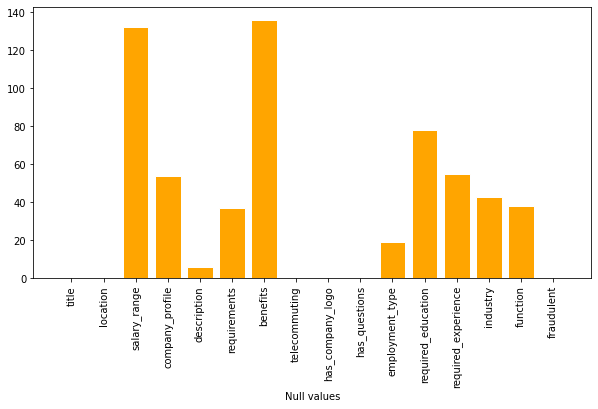

In [192]:
nullval = jobdf.isnull().sum()
plt.figure(figsize=(10,5))
plt.bar(jobdf.columns,nullval,color = 'orange', edgecolor = 'white')
plt.xlabel('Null values')
plt.xticks(rotation='vertical')
plt.show()

In [193]:
jobdf['fraudulent'].value_counts()

0    175
1     45
Name: fraudulent, dtype: int64

#Finding word length count of company_profile, job description, requirements, benefits.

In [194]:
#print(mydf['required_education'].unique())
function = lambda x:len(x.split(' '))

len_compprof = jobdf['company_profile'].astype(str).apply(function)
len_desc = jobdf['description'].astype(str).apply(function)
len_req = jobdf['requirements'].astype(str).apply(function)
len_benefits = jobdf['benefits'].astype(str).apply(function)

print(len_compprof.head())
print(len_desc.head())
print(len_req.head())
print(len_benefits.head())

jobdf['compprof_len'] = len_compprof
jobdf['desc_len'] = len_desc
jobdf['req_len'] = len_req
jobdf['benefits_len'] = len_benefits


0    158
1      3
2    281
3      1
4      1
Name: company_profile, dtype: int64
0     79
1    177
2     86
3     38
4     58
Name: description, dtype: int64
0     2
1     2
2    50
3    36
4     1
Name: requirements, dtype: int64
0    1
1    1
2    1
3    1
4    1
Name: benefits, dtype: int64


#Utilizing NA values in columns. Create new columns like no_description,no_benefits,no_companyProfile, etc. and put 1 if true.

Replacing benefits NaN values by 'empty'

In [195]:
jobdf['company_profile'].fillna('Empty',inplace=True)
jobdf['requirements'].fillna('Empty',inplace=True)
jobdf['description'].fillna('Empty',inplace=True)
jobdf['benefits'].fillna('Empty',inplace=True)

In [196]:
print(jobdf.head())

                                               title               location  \
0                                        QA Engineer  Bengaluru / Bangalore   
1                                                PMO  Bengaluru / Bangalore   
2                                       Chat Support             Chandigarh   
3                                   Angular Engineer                 Remote   
4  Work From Home -Technical Support- Work From H...                 Remote   

    salary_range                                    company_profile  \
0            NaN  Quess IT Staffing. Founded in 1997 as an entre...   
1            NaN                             Templeton and Partners   
2  240000-280000  Tech Mahindra is part of the US $15.4 billion ...   
3            NaN                                    theuniversal.in   
4  220000-409999                                              Empty   

                                         description  \
0  End to End Functional testing of virtua

shuffling rows

In [61]:
#jobdf = jobdf.sample(frac=1).reset_index(drop=True)

In [197]:
print(jobdf.head())

                                               title               location  \
0                                        QA Engineer  Bengaluru / Bangalore   
1                                                PMO  Bengaluru / Bangalore   
2                                       Chat Support             Chandigarh   
3                                   Angular Engineer                 Remote   
4  Work From Home -Technical Support- Work From H...                 Remote   

    salary_range                                    company_profile  \
0            NaN  Quess IT Staffing. Founded in 1997 as an entre...   
1            NaN                             Templeton and Partners   
2  240000-280000  Tech Mahindra is part of the US $15.4 billion ...   
3            NaN                                    theuniversal.in   
4  220000-409999                                              Empty   

                                         description  \
0  End to End Functional testing of virtua

Creating new column empty_benefits, empty_desc, empty_compprof having value as 1 or 0.

In [198]:
checkNA = lambda x: 1 if x=='Empty' else 0

empty_compprof = pd.DataFrame(jobdf['company_profile'].astype(str).apply(checkNA))
empty_desc = pd.DataFrame(jobdf['description'].astype(str).apply(checkNA))
empty_req = pd.DataFrame(jobdf['requirements'].astype(str).apply(checkNA))
empty_benefits = pd.DataFrame(jobdf['benefits'].astype(str).apply(checkNA))


# print(empty_benefits.value_counts())
# print(empty_benefits[:10])

In [199]:
jobdf['empty_compprof'] = empty_compprof
jobdf['empty_desc'] = empty_desc
jobdf['empty_req'] = empty_req
jobdf['empty_benefits'] = empty_benefits



In [200]:
print(jobdf.head())

                                               title               location  \
0                                        QA Engineer  Bengaluru / Bangalore   
1                                                PMO  Bengaluru / Bangalore   
2                                       Chat Support             Chandigarh   
3                                   Angular Engineer                 Remote   
4  Work From Home -Technical Support- Work From H...                 Remote   

    salary_range                                    company_profile  \
0            NaN  Quess IT Staffing. Founded in 1997 as an entre...   
1            NaN                             Templeton and Partners   
2  240000-280000  Tech Mahindra is part of the US $15.4 billion ...   
3            NaN                                    theuniversal.in   
4  220000-409999                                              Empty   

                                         description  \
0  End to End Functional testing of virtua

In [201]:
desc_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].desc_len)
desc_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].desc_len)

print(type(desc_nonfraud))

desc_fraud.reset_index(drop=True,inplace=True)
desc_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


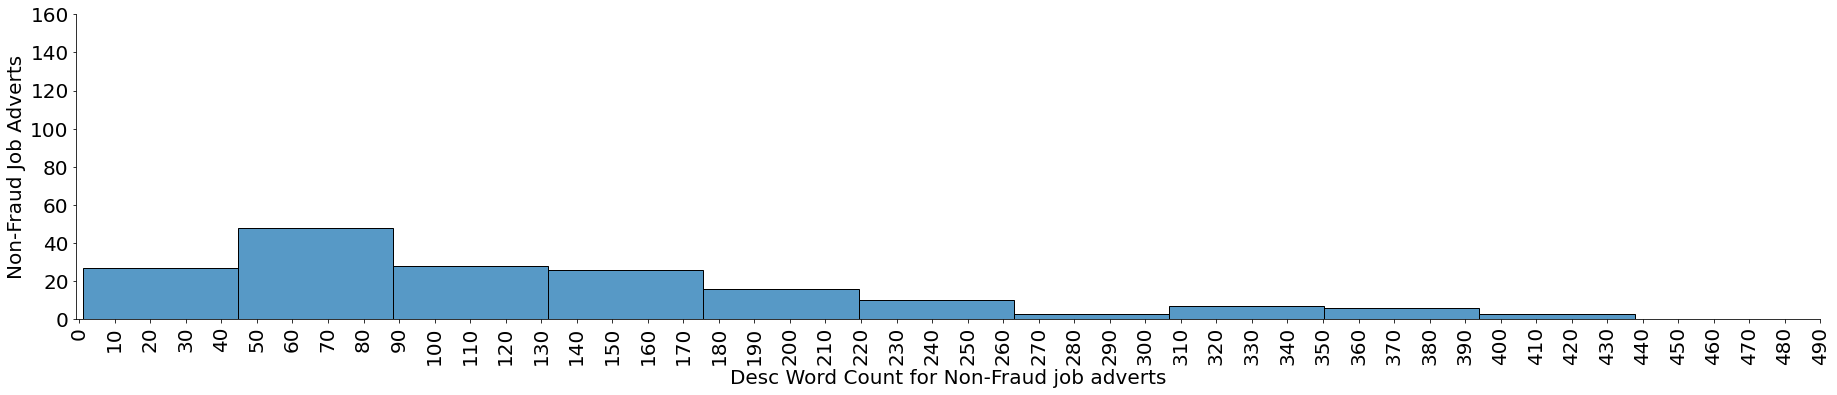

In [202]:
sns.displot(desc_nonfraud['desc_len'], height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Desc Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,500, 10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(desc_nonfraud['desc_len'])),20), fontsize = 20)
plt.show()

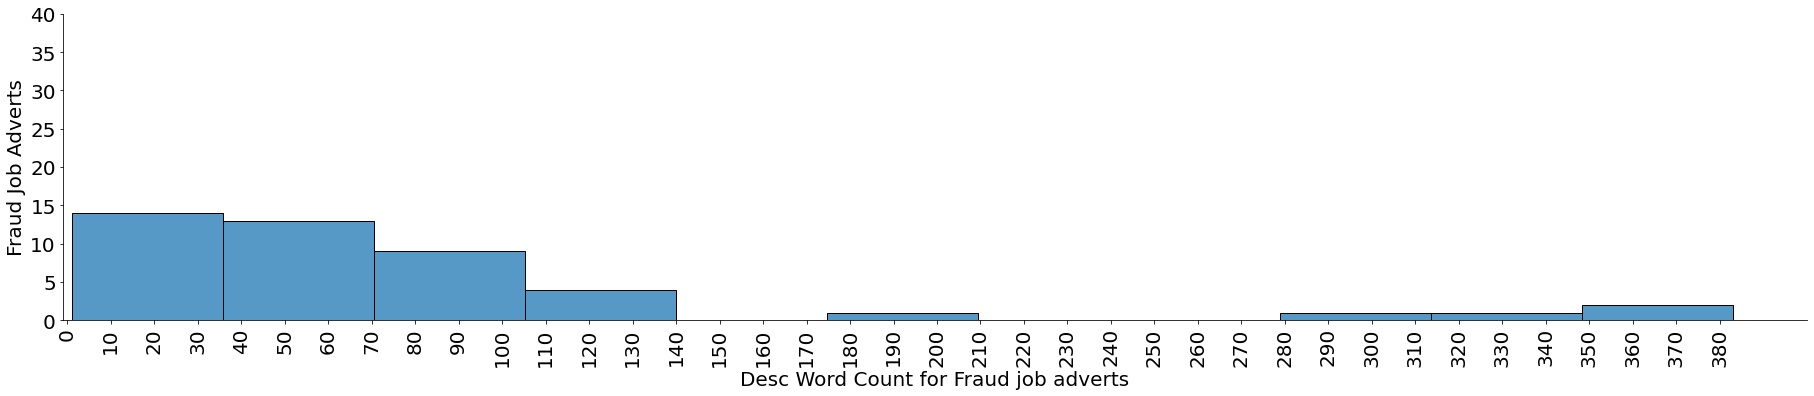

In [68]:
sns.displot(desc_fraud['desc_len'], height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Desc Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,max(list(desc_fraud['desc_len'])), 10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(desc_fraud['desc_len'])), 5), fontsize = 20)
plt.show()

In [69]:
len(jobdf[(jobdf['desc_len']<=90) & (jobdf['fraudulent']==0)])

77

77 out of 175 genuine jobs have desc_len under 90.(44%).
33 out of 45 fraud jobs have desc_len under 90.(73%).

In [203]:
#has short description
def has_short_description(x):
  if x <= 90:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_desc_list = jobdf['desc_len'].apply(has_short_description)

In [204]:
jobdf['has_short_desc'] = short_desc_list
print(short_desc_list[0:5], "\n", jobdf.desc_len.head(5))



0    1
1    0
2    1
3    1
4    1
Name: desc_len, dtype: int64 
 0     79
1    177
2     86
3     38
4     58
Name: desc_len, dtype: int64


In [205]:
benefits_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].benefits_len)
benefits_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].benefits_len)

print(type(benefits_nonfraud))

benefits_fraud.reset_index(drop=True,inplace=True)
benefits_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


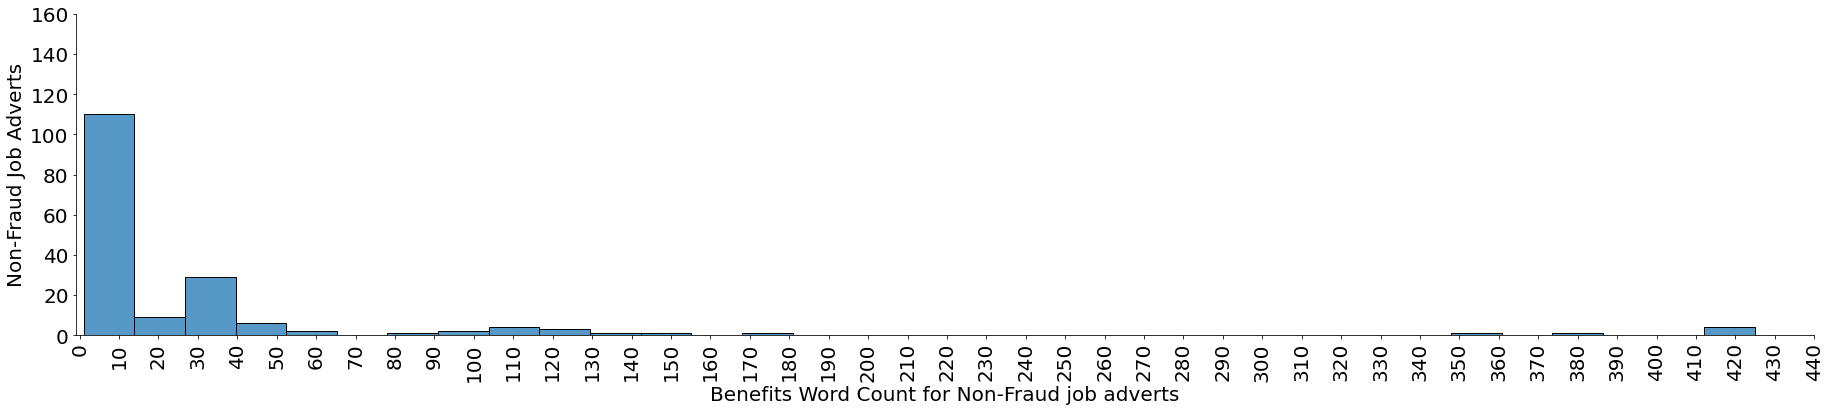

In [206]:
sns.displot(list(benefits_nonfraud['benefits_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Benefits Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,450,10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(benefits_nonfraud['benefits_len'])),20), fontsize = 20)
plt.show()

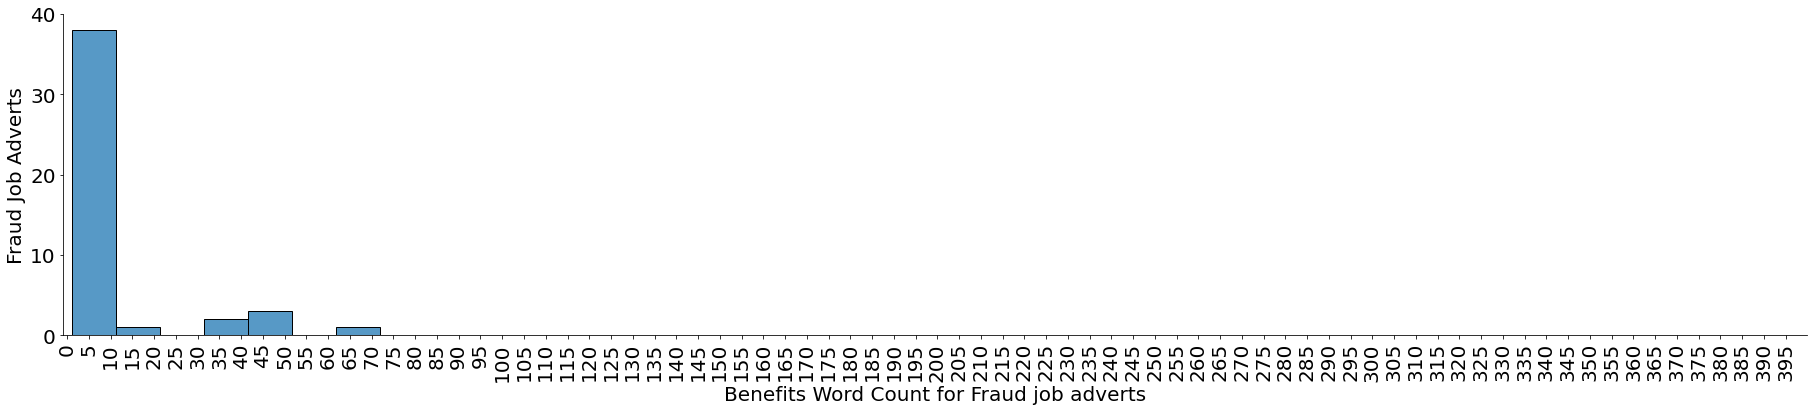

In [207]:
sns.displot(list(benefits_fraud['benefits_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Benefits Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,400,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(benefits_fraud['benefits_len'])),10), fontsize = 20)
plt.show()

In [75]:
len(jobdf[(jobdf['benefits_len']<=10) & (jobdf['fraudulent']==1)])

38

Company profile length

In [208]:
compprof_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].compprof_len)
compprof_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].compprof_len)

print(type(compprof_nonfraud))

compprof_fraud.reset_index(drop=True,inplace=True)
compprof_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


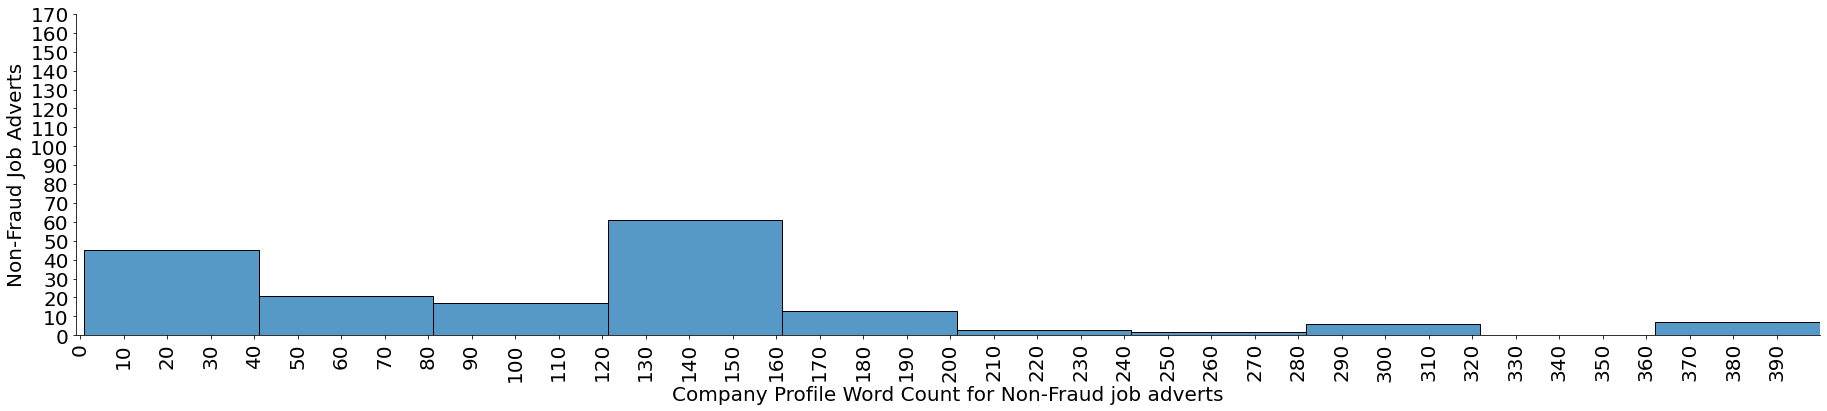

In [209]:
sns.displot(list(compprof_nonfraud['compprof_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Company Profile Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,400,10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(compprof_nonfraud['compprof_len'])),10), fontsize = 20)
plt.show()

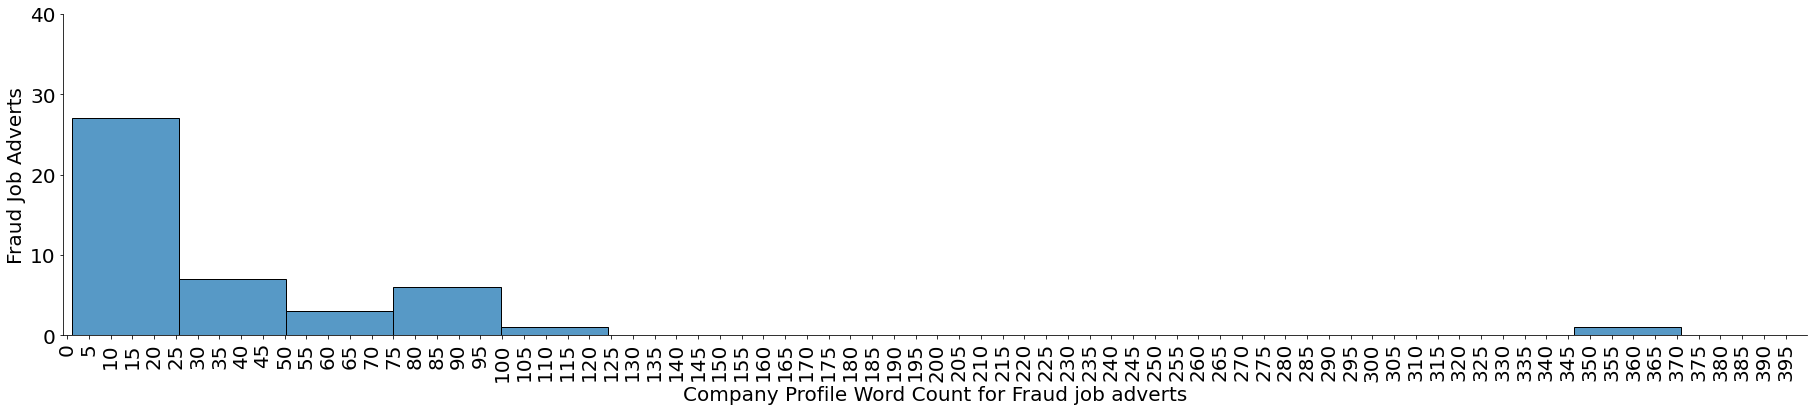

In [210]:
sns.displot(list(compprof_fraud['compprof_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Company Profile Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,400,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(compprof_fraud['compprof_len'])),10), fontsize = 20)
plt.show()

In [79]:
len(jobdf[(jobdf['compprof_len']<=50) & (jobdf['fraudulent']==1)])

34

In [211]:
#has short company profile
def has_short_compprof(x):
  if x <= 50:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_compprof_list = jobdf['compprof_len'].apply(has_short_compprof)

In [212]:
jobdf['has_short_compprof'] = short_compprof_list
print(short_compprof_list[0:5], "\n", jobdf.compprof_len.head(5))

0    0
1    1
2    0
3    1
4    1
Name: compprof_len, dtype: int64 
 0    158
1      3
2    281
3      1
4      1
Name: compprof_len, dtype: int64


In [213]:
req_len_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].req_len)
req_len_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].req_len)

print(type(req_len_fraud))

req_len_fraud.reset_index(drop=True,inplace=True)
req_len_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


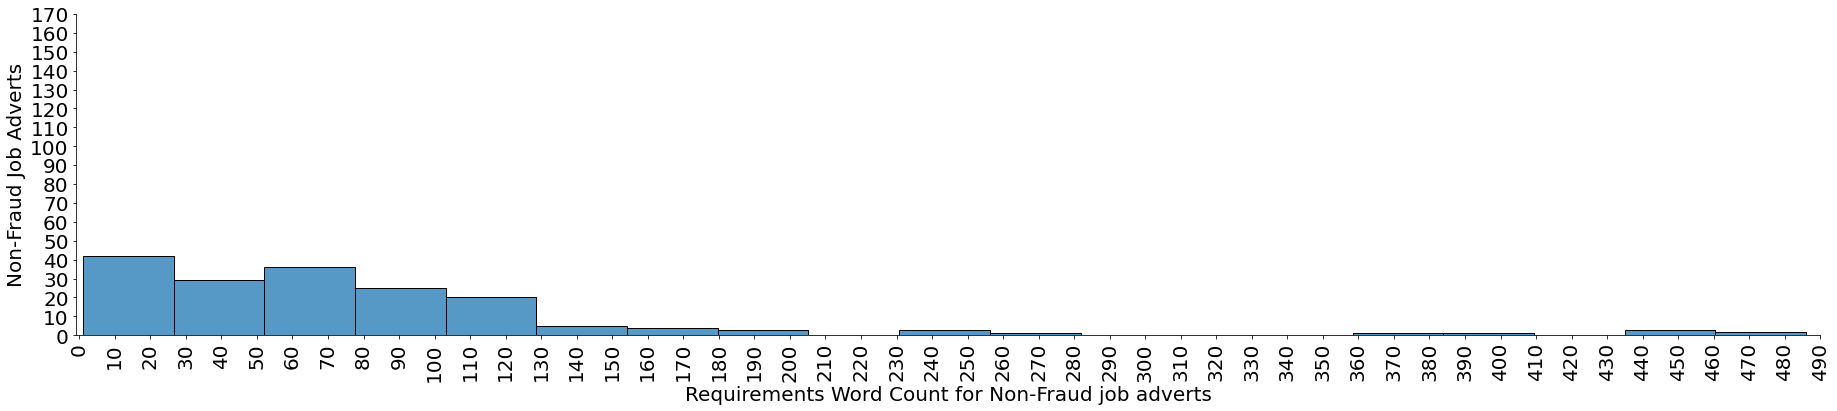

In [214]:
sns.displot(list(req_len_nonfraud['req_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Requirements Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,500,10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(req_len_nonfraud['req_len'])),10), fontsize = 20)
plt.show()

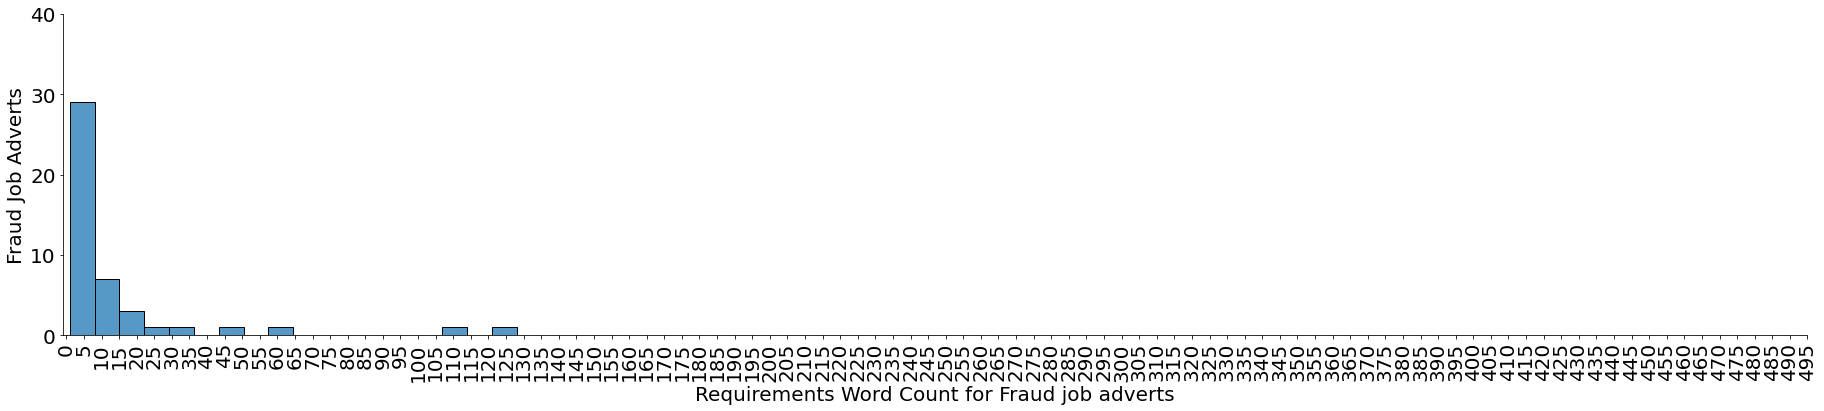

In [215]:
sns.displot(list(req_len_fraud['req_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Requirements Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,500,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(req_len_fraud['req_len'])), 10), fontsize = 20)
plt.show()

In [216]:
len(jobdf[(jobdf['req_len']<=7) & (jobdf['fraudulent']==0)])

23

28 out of 45 Fraud jobs have less than 7 requirements word count(62%).
23 out 175 Non-Fraud jobs have less than 7 requiremnts word count(13%).

In [218]:
#has short requirements
def has_short_req(x):
  if x <= 7:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_req_list = jobdf['req_len'].apply(has_short_req)

In [219]:
jobdf['has_short_req'] = short_req_list
print(short_req_list[0:5], "\n", jobdf.req_len.head(5))

0    1
1    1
2    0
3    0
4    1
Name: req_len, dtype: int64 
 0     2
1     2
2    50
3    36
4     1
Name: req_len, dtype: int64


Replacing NaN values to Empty

In [220]:
jobdf['employment_type'].fillna('Empty',inplace=True)
jobdf['required_experience'].fillna('Empty',inplace=True)
jobdf['required_education'].fillna('Empty',inplace=True)
jobdf['industry'].fillna('Empty',inplace=True)
jobdf['function'].fillna('Empty',inplace=True)



In [221]:
jobdf.head()

,title,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_education,required_experience,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_short_req
0,QA Engineer,Bengaluru / Bangalore,NaN,Quess IT Staffing. Founded in 1997 as an entre...,End to End Functional testing of virtual educa...,Api Testing,Empty,0,1,1,Full time,Masters,Mid-Senior level,"IT/Computers - Hardware & Networking , IT/Comp...",IT,0,158,79,2,1,0,0,0,1,1,0,1
1,PMO,Bengaluru / Bangalore,NaN,Templeton and Partners,Understand the Project Delivery Framework (PDF...,Project Finance,Empty,0,0,1,Part time,Masters,Mid-Senior level,IT / Computers - Software,Empty,0,3,177,2,1,0,0,0,1,0,1,1
2,Chat Support,Chandigarh,240000-280000,Tech Mahindra is part of the US $15.4 billion ...,Process:- English process (Chat Process)\nNote...,Eligibility Criteria:-\nMandatory: Excellent c...,Empty,0,1,1,Full time,Bachelors,Associate,ITES/BPO,Customer Service/Call Centre/BPO,0,281,86,50,1,0,0,0,1,1,0,0
3,Angular Engineer,Remote,NaN,theuniversal.in,Responsibilities :1. Work closely with the tea...,Technical skills required :1. Angular 10 and a...,Empty,1,0,0,Full time,Bachelors,Associate,IT/Computers - Software,IT,1,1,38,36,1,0,0,0,1,1,1,0
4,Work From Home -Technical Support- Work From H...,Remote,220000-409999,Empty,Job Description:Voice support to the customer....,Empty,Empty,1,0,0,Part time,Bachelors,Associate,Telecom,Customer Service/Call Centre/BPO,1,1,58,1,1,1,0,1,1,1,1,1


#Create new feature has_special_attributes

In [222]:
special_attr_list = []

for i in range(len(jobdf['required_education'])):
  a = jobdf['required_education'][i]
  b = jobdf['required_experience'][i]
  c = jobdf['function'][i]

  if a == 'Empty' and b == 'Empty' and c == 'Empty':
    special_attr_list.append(1)
  else:
    special_attr_list.append(0)
  


In [223]:
jobdf['has_spec_attr'] = special_attr_list

In [224]:
jobdf.head()

,title,location,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_education,required_experience,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_short_req,has_spec_attr
0,QA Engineer,Bengaluru / Bangalore,NaN,Quess IT Staffing. Founded in 1997 as an entre...,End to End Functional testing of virtual educa...,Api Testing,Empty,0,1,1,Full time,Masters,Mid-Senior level,"IT/Computers - Hardware & Networking , IT/Comp...",IT,0,158,79,2,1,0,0,0,1,1,0,1,0
1,PMO,Bengaluru / Bangalore,NaN,Templeton and Partners,Understand the Project Delivery Framework (PDF...,Project Finance,Empty,0,0,1,Part time,Masters,Mid-Senior level,IT / Computers - Software,Empty,0,3,177,2,1,0,0,0,1,0,1,1,0
2,Chat Support,Chandigarh,240000-280000,Tech Mahindra is part of the US $15.4 billion ...,Process:- English process (Chat Process)\nNote...,Eligibility Criteria:-\nMandatory: Excellent c...,Empty,0,1,1,Full time,Bachelors,Associate,ITES/BPO,Customer Service/Call Centre/BPO,0,281,86,50,1,0,0,0,1,1,0,0,0
3,Angular Engineer,Remote,NaN,theuniversal.in,Responsibilities :1. Work closely with the tea...,Technical skills required :1. Angular 10 and a...,Empty,1,0,0,Full time,Bachelors,Associate,IT/Computers - Software,IT,1,1,38,36,1,0,0,0,1,1,1,0,0
4,Work From Home -Technical Support- Work From H...,Remote,220000-409999,Empty,Job Description:Voice support to the customer....,Empty,Empty,1,0,0,Part time,Bachelors,Associate,Telecom,Customer Service/Call Centre/BPO,1,1,58,1,1,1,0,1,1,1,1,1,0


Correcting employment type categories.

In [225]:
jobdf['employment_type'].unique()

array(['Full time', 'Part time', 'Full Time', 'Part Time', 'Full-time',
       'Empty', 'Contract', 'Part-time', 'Other', 'Temporary'],
      dtype=object)

In [226]:
jobdf['employment_type'].replace(['Full Time', 'Full-time', 'Full Time', 'Full time'], 'Full Time', inplace=True)
jobdf['employment_type'].replace(['Part-time', 'Part time', 'Part Time'], 'Part Time', inplace=True)

In [227]:
jobdf['employment_type'].unique()

array(['Full Time', 'Part Time', 'Empty', 'Contract', 'Other',
       'Temporary'], dtype=object)

Correcting required_education categories.

In [228]:
jobdf['required_education'].unique()

array(['Masters', 'Bachelors', 'Bachelors\xa0', 'Not specified', 'SSC',
       'HSC', 'Bachelors/ Masters', 'Bachelors/Masters',
       'HSC/Bachelors/Masters', 'HSC/Bachelors', 'Civil Engineer',
       'Electrical Engineer', 'MBA', 'Empty', 'Diploma',
       "Bachelor's Degree", "Master's Degree", 'Unspecified',
       'Certification', 'Professional'], dtype=object)

In [229]:
jobdf['required_education'].replace(['Bachelors', 'Bachelors\xa0', 'Bachelor\'s Degree'], 'Bachelor\'s Degree', inplace=True)
jobdf['required_education'].replace(['Master\'s Degree', 'Masters'], 'Master\'s Degree', inplace=True)
jobdf['required_education'].replace(['Civil Engineer', 'Electrical Engineer'], 'Engineer', inplace=True)
jobdf['required_education'].replace(['Not specified'], 'Empty', inplace=True)
jobdf['required_education'].replace(['Bachelors/ Masters'], 'Bachelors/Masters', inplace=True)

In [230]:
jobdf['required_education'].unique()

array(["Master's Degree", "Bachelor's Degree", 'Empty', 'SSC', 'HSC',
       'Bachelors/Masters', 'HSC/Bachelors/Masters', 'HSC/Bachelors',
       'Engineer', 'MBA', 'Diploma', 'Unspecified', 'Certification',
       'Professional'], dtype=object)

In [231]:
jobdf['required_experience'].unique()

array(['Mid-Senior level', 'Associate', 'Senior level', 'Fresher',
       'Entry level', 'Empty', 'Not Applicable', 'Internship', 'Director',
       'Executive'], dtype=object)

In [ ]:
#jobdf['function'].unique()

Average of Length of Textual columns for Fraud and NonFraud job adverts

In [232]:
from numpy.lib.function_base import average
print(average(compprof_fraud))
print(average(compprof_nonfraud))

print(average(desc_fraud))
print(average(desc_nonfraud))

print(average(benefits_fraud))
print(average(benefits_nonfraud))

print(average(req_len_fraud))
print(average(req_len_nonfraud)) 



34.91111111111111
116.86285714285714
82.24444444444444
136.49714285714285
7.444444444444445
33.10285714285714
13.977777777777778
82.59428571428572


In [233]:
detectdf = jobdf.copy()

In [234]:
detectdf.drop(['title','location','salary_range','company_profile','description','requirements','benefits','compprof_len','desc_len','benefits_len','req_len'],axis=1,inplace=True)

In [106]:
# detectdf.drop(['job_id'],axis=1,inplace=True)

In [235]:
detectdf = detectdf[['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','empty_compprof','empty_desc','empty_req','empty_benefits','has_short_desc','has_short_compprof', 'has_short_req', 'has_spec_attr','fraudulent']]

In [236]:
detectdf = pd.get_dummies(detectdf, columns = ['employment_type','required_education','required_experience','industry','function'])
detectdf.head()

,telecommuting,has_company_logo,has_questions,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_short_req,has_spec_attr,fraudulent,employment_type_Contract,employment_type_Empty,employment_type_Full Time,employment_type_Other,employment_type_Part Time,employment_type_Temporary,required_education_Bachelor's Degree,required_education_Bachelors/Masters,required_education_Certification,required_education_Diploma,required_education_Empty,required_education_Engineer,required_education_HSC,required_education_HSC/Bachelors,required_education_HSC/Bachelors/Masters,required_education_MBA,required_education_Master's Degree,required_education_Professional,required_education_SSC,required_education_Unspecified,required_experience_Associate,required_experience_Director,required_experience_Empty,required_experience_Entry level,required_experience_Executive,required_experience_Fresher,required_experience_Internship,required_experience_Mid-Senior level,required_experience_Not Applicable,required_experience_Senior level,industry_\nBio Technology & Life Sciences,industry_Airlines / Aviation / Aerospace,industry_Airlines/Aviation/Aerospace,industry_Animation,industry_Aviation / Airline,industry_Banking / Accounting / Financial Services,industry_Banking/Accounting/Financial Services,industry_Computer Networking,industry_Computer Software,industry_Construction & Engineering,industry_Consulting / Advisory Services,industry_Education / Training,industry_Education Management,industry_Empty,industry_Engineering & Design,industry_Engineering / Construction,industry_Entertainment / Media / Publishing,industry_Entertainment/Media/Publishing,industry_Graphic Design,industry_Hospital & Health Care,industry_Hospitals/Healthcare/Diagnostics,industry_IT,industry_IT - Hardware / Networking,industry_IT - Hardware / Networking,industry_IT - Software,industry_IT - Software,industry_IT / Computers - Software,"industry_IT/Computers - Hardware & Networking , IT/Computers - Software",industry_IT/Computers - Software,industry_IT/Computers - Software,industry_IT/Computers - Software,industry_ITES/BPO,industry_ITES/BPO,industry_IT / Computers - Software,industry_Information Services,industry_Information Technology and Services,industry_Internet,industry_Internet / E-commerce,industry_Internet/E-commerce,industry_Internet/E-commerce,industry_Luxury Goods & Jewelry,industry_Manufacturing,industry_Market Research,industry_Nonprofit Organization Management,industry_Oil & Gas / Petroleum,industry_Other,industry_Other,industry_Outsourcing/Offshoring,industry_Pharmaceuticals,industry_Recruitment/Staffing/RPO,industry_Retail,industry_Software Development,industry_T / Computers - Software,industry_Telecom,industry_Wellness/Fitness/Sports,industry_Writing and Editing,industry_ IT/Computers - Software,function_Accounting/Auditing,function_Admin / Secretarial / Front Office,function_Administrative,function_Airport / Airline Ground OperationsService / Installation / Repair,function_Art/Creative,function_Banking,function_Consulting,function_Customer Service (Domestic),function_Customer Service/Call Centre/BPO,function_Customer Service/Call Centre/BPO,function_Design,function_Development,function_Digital Marketing,function_Education,function_Education / Teaching,function_Empty,function_Engineering,function_Engineering - Electrical,function_Engineering - Mechanical,function_Engineering Design / Construction,function_Engineering Design / Construction Oil & Gas Engineering,function_Finance & Accounts,function_General / Other Software,function_General / Other Software Network / System Administration,function_Health Care,function_Health Care,function_Health Care Provider,function_Human Resources,function_Human Resources,function_IT,function_IT,function_IT - Software,"function_IT- Hardware/Telecom/Technical Staff/Support , IT/Software Development - Network Administration/Security",function_Information Technology,function_Journalism / Content Writing / Ed

#Importing necessary libraries.

And Undersampling...

In [395]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC  

In [396]:
jdf = detectdf.drop(['fraudulent'],axis=1)
y = detectdf['fraudulent']

In [397]:
print(jdf.shape)
print(y.shape)

(220, 152)
(220,)


#Splitting the data train test

In [398]:
X_train, X_test, y_train, y_test = train_test_split(jdf, y,test_size = 0.3, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (154, 152)
Testing split input-  (66, 152)


In [399]:
print(X_train.shape)
print(y_train.shape)

(154, 152)
(154,)


In [400]:
actual = y_test

#DECISION TREE

In [401]:
dtree=DecisionTreeClassifier()
p = dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [402]:
y_pred_dtree = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.86      0.92      0.89        13

    accuracy                           0.95        66
   macro avg       0.92      0.94      0.93        66
weighted avg       0.96      0.95      0.96        66



In [404]:
sm.accuracy_score(y_test, y_pred_dtree)*100

92.42424242424242

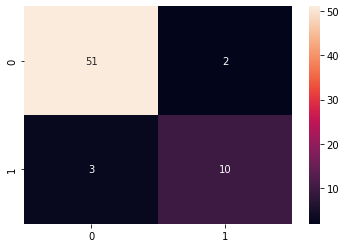

In [405]:
pred = pd.DataFrame(y_pred_dtree)
cf_matrix = sm.confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix, annot = True, fmt='g')

In [406]:
dtree_acc = sm.accuracy_score(y_test, y_pred_dtree)*100

In [ ]:
# dot_data = tree.export_graphviz(p,feature_names = X_train.columns,class_names=['0','1'], filled=True, precision=4)
# graph = graphviz.Source(dot_data, format="png") 
# graph

#RANDOM FOREST

In [407]:

clf = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1, min_samples_split = 2) 
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred_rf = clf.predict(X_test)
 
# metrics are used to find accuracy or error
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", sm.accuracy_score(y_test, y_pred_rf))


ACCURACY OF THE MODEL:  0.9393939393939394


In [417]:
random_for_acc = sm.accuracy_score(y_test, y_pred_rf)*100

In [409]:
print("Classification report - \n", classification_report(y_test,y_pred_rf))

Classification report - 
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        53
           1       0.80      0.92      0.86        13

    accuracy                           0.94        66
   macro avg       0.89      0.93      0.91        66
weighted avg       0.94      0.94      0.94        66



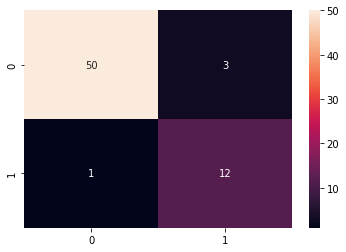

In [410]:
p = pd.DataFrame(y_pred_rf)
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')



#SVM

In [411]:
#SVM
from sklearn.svm import SVC

clf = SVC(kernel='rbf', C = 10, gamma = 0.1) 
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred_svm = clf.predict(X_test)
 
# metrics are used to find accuracy or error
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", sm.accuracy_score(y_test, y_pred_svm))


ACCURACY OF THE MODEL:  0.9848484848484849


In [416]:
svm_acc = sm.accuracy_score(y_test, y_pred_svm)*100

In [413]:
print("Classification report - \n", classification_report(y_test,y_pred_svm))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.93      1.00      0.96        13

    accuracy                           0.98        66
   macro avg       0.96      0.99      0.98        66
weighted avg       0.99      0.98      0.99        66



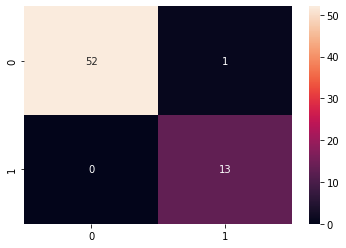

In [414]:
p = pd.DataFrame(y_pred_svm)
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')

#SVM HPT

In [ ]:
param_grid={'C':[0.1,1,10,100],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

grid=GridSearchCV(SVC(),param_grid,verbose=5)
grid.fit(X_train,y_train)

In [265]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.9544444444444444
SVC(C=10, gamma=0.1)


In [266]:
clf = SVC(kernel='rbf',C=10, gamma=0.1) 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

SVC(C=10, gamma=0.1)

In [267]:
pred = clf.predict(X_test)

In [268]:

accuracy_score(y_test, pred)

0.9318181818181818

In [269]:
print("Classification report - \n", classification_report(y_test,pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.90      0.82      0.86        11

    accuracy                           0.93        44
   macro avg       0.92      0.89      0.91        44
weighted avg       0.93      0.93      0.93        44



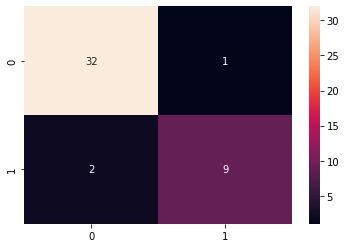

In [270]:

p = pd.DataFrame(pred)
actual
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')

SVM HPT End

#Plotting Accuracy of Decision Tree, Random Forest and SVM.

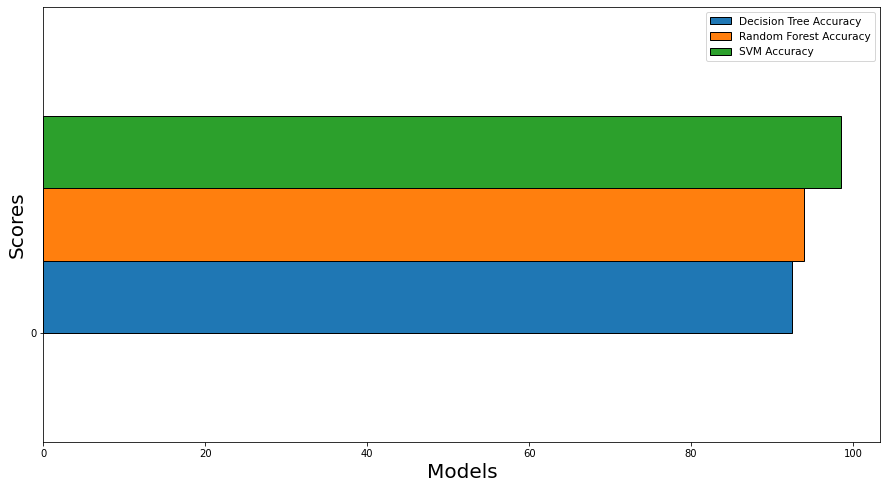

In [418]:
modelacc1 = pd.DataFrame({"Decision Tree Accuracy ": [dtree_acc],
                               "Random Forest Accuracy": [random_for_acc],
                          "SVM Accuracy": [svm_acc]})
modelacc1.plot.barh(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);